In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('../data/divvy_daily.csv')
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)

In [2]:
model.add_country_holidays(country_name='US')

09:51:39 - cmdstanpy - INFO - Chain [1] start processing
09:51:39 - cmdstanpy - INFO - Chain [1] done processing


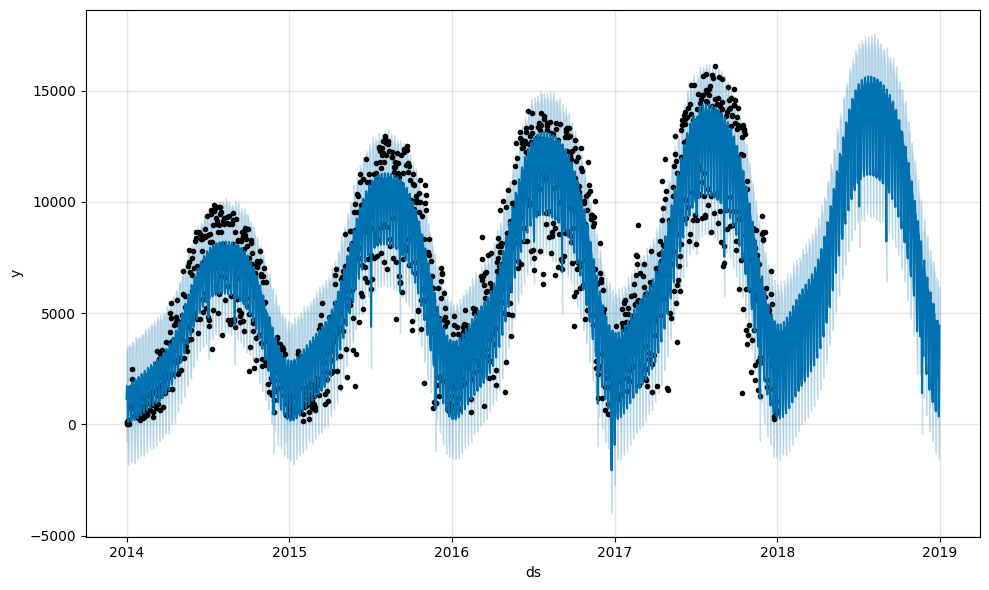

In [3]:
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

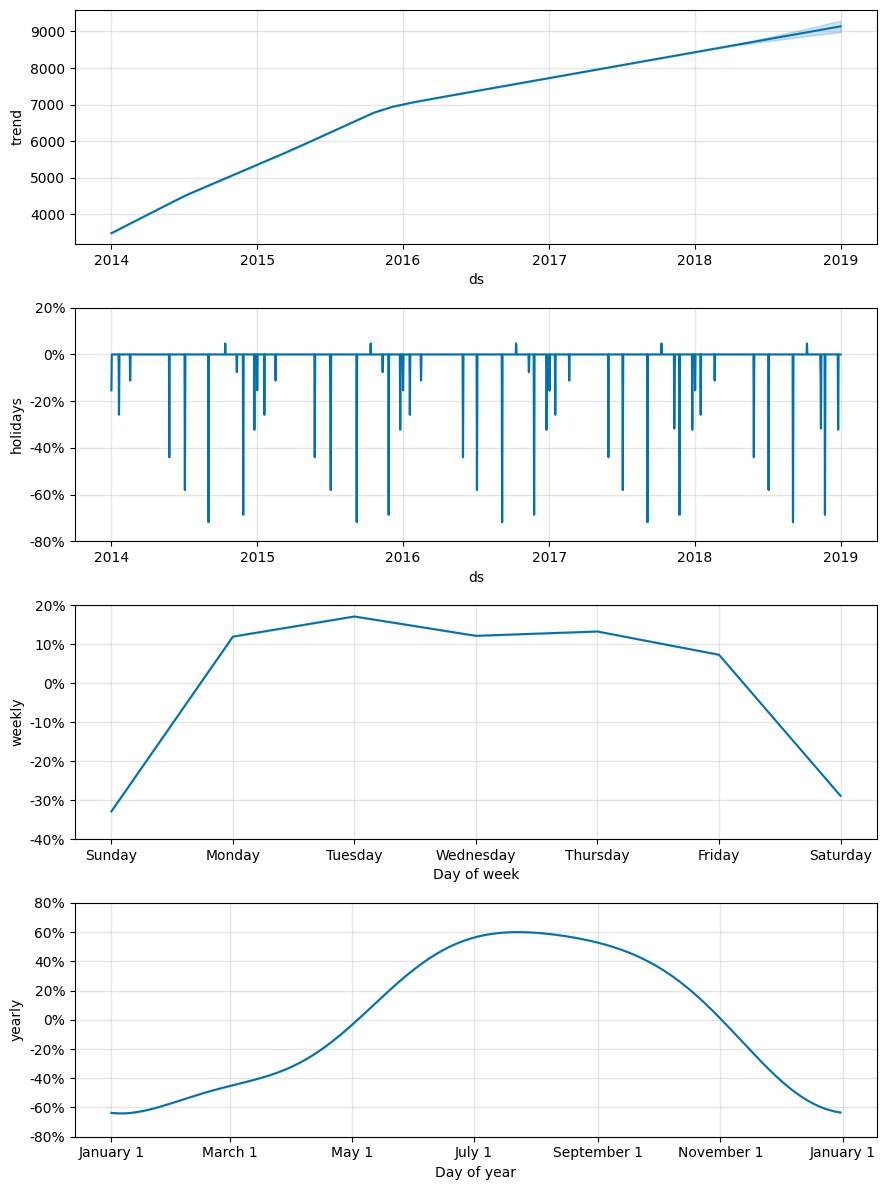

In [4]:
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
model.train_holiday_names

0                  New Year's Day
1                    Memorial Day
2                Independence Day
3                       Labor Day
4                    Veterans Day
5                    Thanksgiving
6                   Christmas Day
7        Christmas Day (observed)
8      Martin Luther King Jr. Day
9           Washington's Birthday
10                   Columbus Day
11      New Year's Day (observed)
12        Veterans Day (observed)
13    Independence Day (observed)
dtype: object

In [6]:
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in \
                         model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.153602
1,Memorial Day,-0.439676
2,Independence Day,-0.580004
3,Labor Day,-0.717600
4,Veterans Day,-0.075754
5,Thanksgiving,-0.686083
6,Christmas Day,-0.321907
7,Christmas Day (observed),-0.192799
8,Martin Luther King Jr. Day,-0.257913
9,Washington's Birthday,-0.111739


In [10]:
from prophet.make_holidays import make_holidays_df

In [17]:
year_list = df['ds'].dt.year.unique().tolist()
year_list.append(year_list[-1] + 1)
holidays = make_holidays_df(year_list=year_list,
                            country='US',
                            state='IL')

In [18]:
holidays.head()

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day


In [19]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

10:14:15 - cmdstanpy - INFO - Chain [1] start processing
10:14:15 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday


In [21]:
holidays = make_holidays_df(year_list=year_list,
                            country='US')
holidays

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-05-30,Memorial Day
2,2016-07-04,Independence Day
3,2016-09-05,Labor Day
4,2016-11-11,Veterans Day
5,2016-11-24,Thanksgiving
6,2016-12-25,Christmas Day
7,2016-12-26,Christmas Day (observed)
8,2016-01-18,Martin Luther King Jr. Day
9,2016-02-15,Washington's Birthday


In [22]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(
                                 ['2014-11-28',
                                  '2015-11-27',
                                  '2016-11-25',
                                  '2017-11-24',
                                  '2018-11-23'])})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(
                                  ['2014-12-24',
                                   '2015-12-24',
                                   '2016-12-24',
                                   '2017-12-24',
                                   '2018-12-24'])})

In [23]:
holidays = pd.concat([holidays, black_friday,
                      christmas_eve]).sort_values('ds')\
                      .reset_index(drop=True)

In [24]:
holidays

,ds,holiday
0,2014-01-01,New Year's Day
1,2014-01-20,Martin Luther King Jr. Day
2,2014-02-17,Washington's Birthday
3,2014-05-26,Memorial Day
4,2014-07-04,Independence Day
...,...,...
60,2018-11-12,Veterans Day (observed)
61,2018-11-22,Thanksgiving
62,2018-11-23,Black Friday
63,2018-12-24,Christmas Eve


In [26]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

10:21:02 - cmdstanpy - INFO - Chain [1] start processing
10:21:02 - cmdstanpy - INFO - Chain [1] done processing


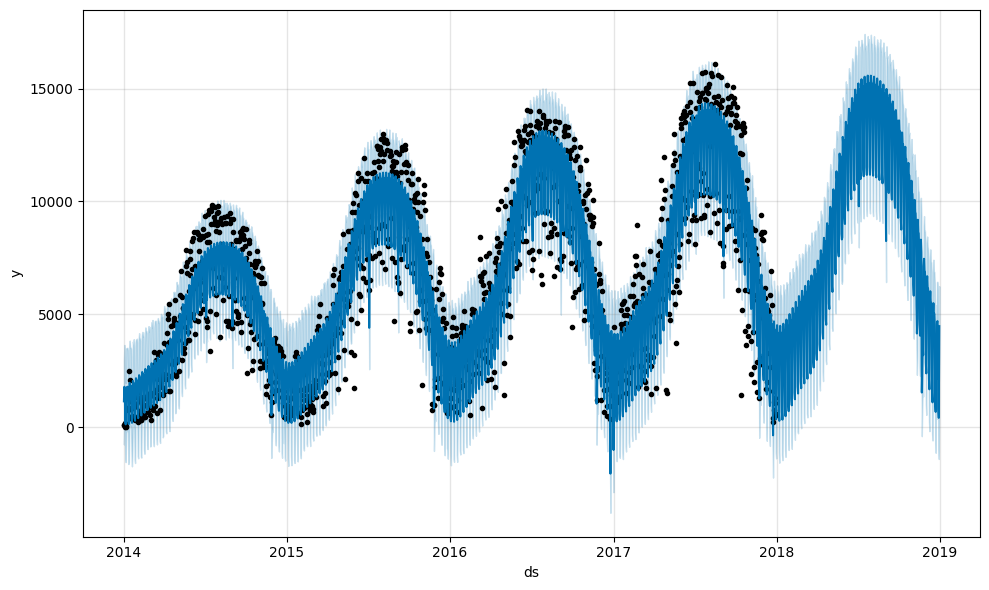

In [28]:
fig = model.plot(forecast)
plt.show()

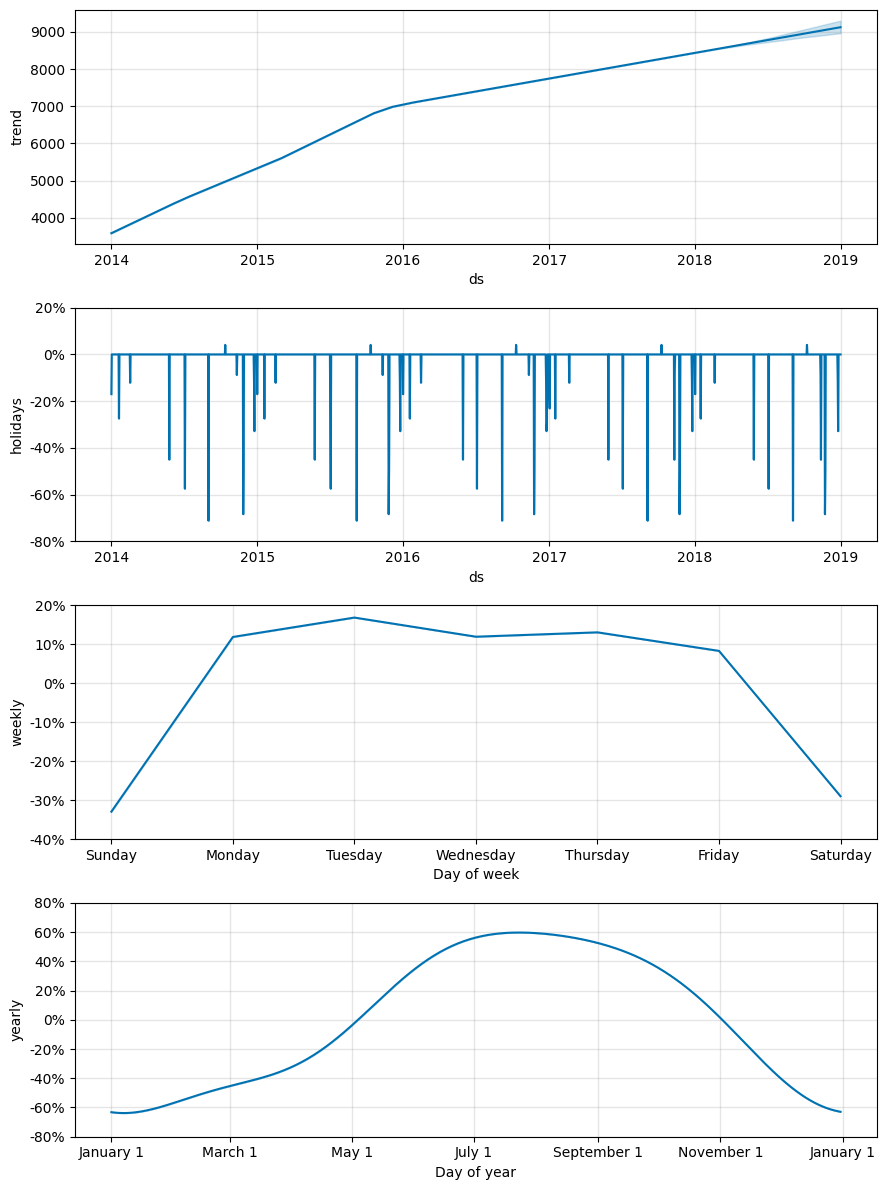

In [29]:
fig2 = model.plot_components(forecast)
plt.show()

In [30]:
holidays = make_holidays_df(year_list=year_list,
                            country='US')
taste_of_chicago =\
    pd.DataFrame({'holiday': 'Taste of Chicago',
                  'ds': pd.to_datetime(['2014-07-09',
                                        '2015-07-08',
                                        '2016-07-06',
                                        '2017-07-05',
                                        '2018-07-11']),
                  'lower_window': 0,
                  'upper_window': 4})
holidays = pd.concat([holidays, taste_of_chicago])\
                     .sort_values('ds')\
                     .reset_index(drop=True)

In [31]:
holidays.head(10)

,ds,holiday,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN
5,2014-07-09,Taste of Chicago,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN


10:50:23 - cmdstanpy - INFO - Chain [1] start processing
10:50:23 - cmdstanpy - INFO - Chain [1] done processing


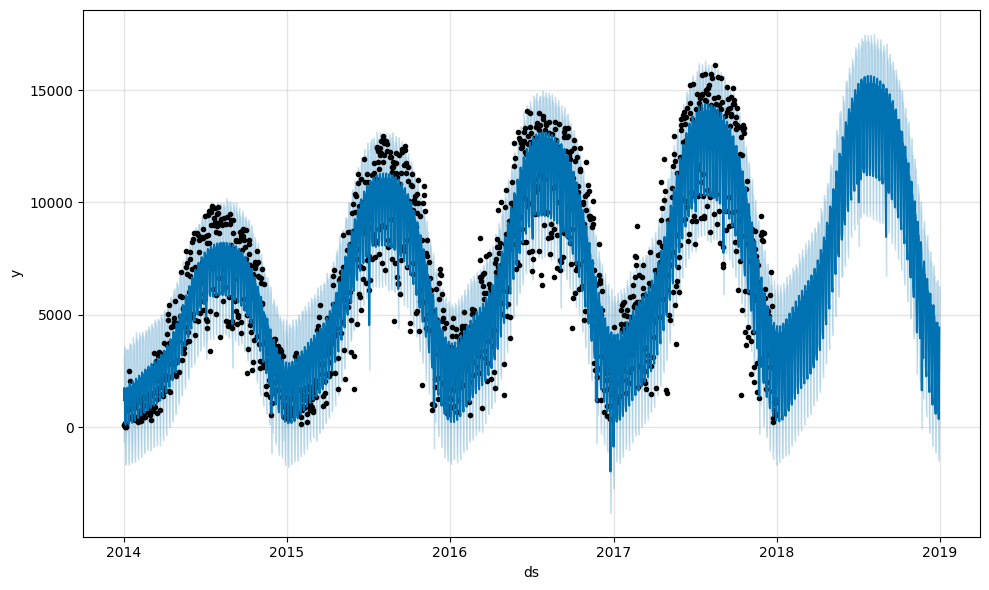

In [32]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

In [35]:
print(forecast[forecast['ds'].isin(['2018-07-11',
                                    '2018-07-12',
                                    '2018-07-13',
                                    '2018-07-14',
                                    '2018-07-15']
                                    )][['ds',
                                        'Taste of Chicago']])

             ds  Taste of Chicago
1649 2018-07-11         -0.036142
1650 2018-07-12          0.020550
1651 2018-07-13          0.069227
1652 2018-07-14          0.014990
1653 2018-07-15          0.021666


/var/folders/fn/cyp1s2wj7c39s35jrjsksnkw0000gn/T/ipykernel_7094/2713555935.py:1: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  print(forecast[forecast['ds'].isin(['2018-07-11',


In [36]:
from prophet.plot import plot_forecast_component

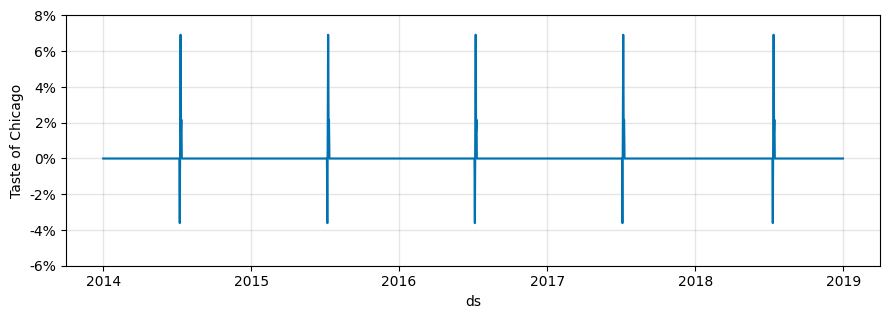

In [37]:
fig3 = plot_forecast_component(model,
                               forecast,
                               'Taste of Chicago',
                               figsize=(10.5, 3.25))
plt.show()

11:04:49 - cmdstanpy - INFO - Chain [1] start processing
11:04:49 - cmdstanpy - INFO - Chain [1] done processing


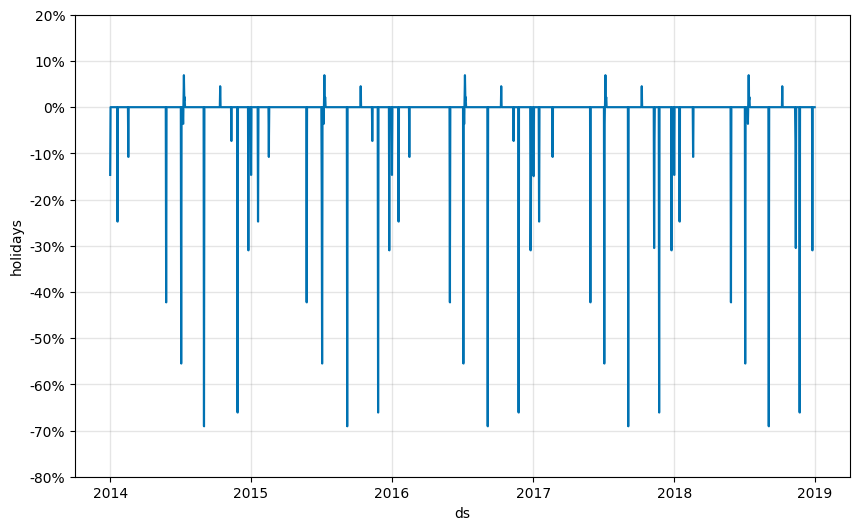

In [38]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=10)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()

11:06:46 - cmdstanpy - INFO - Chain [1] start processing
11:06:46 - cmdstanpy - INFO - Chain [1] done processing


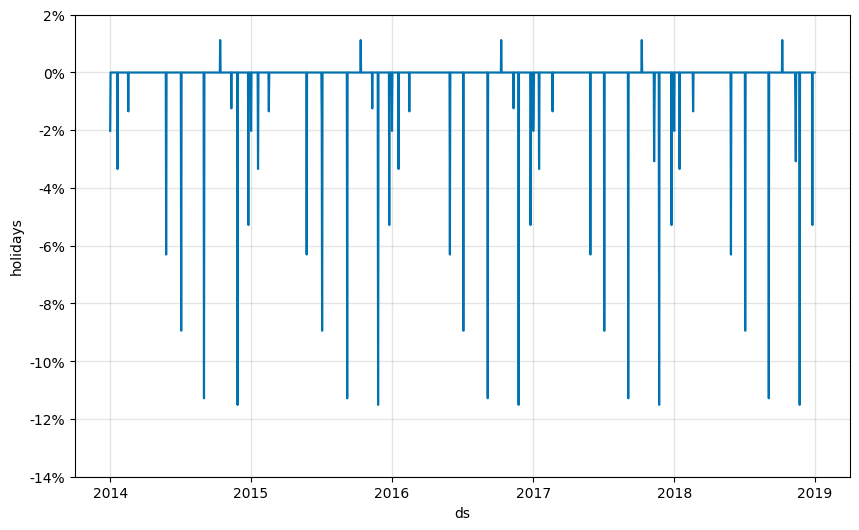

In [41]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=0.05)
model.add_country_holidays(country_name='US')
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()

In [49]:
holidays = make_holidays_df(year_list=year_list,
                            country='US')

In [50]:
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(
                                 ['2014-11-28',
                                  '2015-11-27',
                                  '2016-11-25',
                                  '2017-11-24',
                                  '2018-11-23']),
                             'prior_scale': 1})
christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(
                                  ['2014-12-24',
                                   '2015-12-24',
                                   '2016-12-24',
                                   '2017-12-24',
                                   '2018-12-24']),
                              'prior_scale': 1})
taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(
                                     ['2014-07-09',
                                      '2015-07-08',
                                      '2016-07-06',
                                      '2017-07-05',
                                      '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4,
                                 'prior_scale': 0.1})

In [51]:
holidays = pd.concat([holidays,
                      black_friday,
                      christmas_eve,
                      taste_of_chicago]
                      ).sort_values('ds')\
                       .reset_index(drop=True)

In [52]:
holidays.head(16)

,ds,holiday,prior_scale,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN,NaN
5,2014-07-09,Taste of Chicago,0.1,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN,NaN


In [53]:
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

11:20:38 - cmdstanpy - INFO - Chain [1] start processing
11:20:38 - cmdstanpy - INFO - Chain [1] done processing


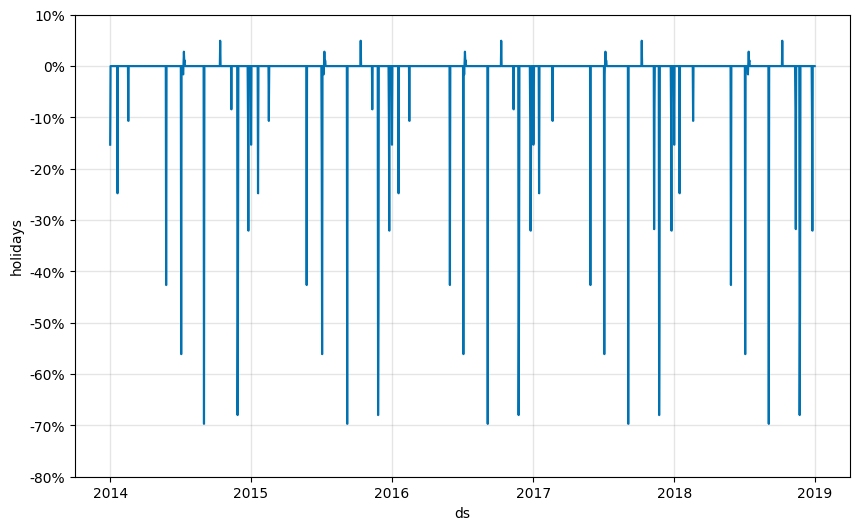

In [54]:
fig = plot_forecast_component(model, forecast, 'holidays')
plt.show()